# Study Habits Analysis: Lab Work Patterns

**Author**: Guillermo Fiallo Montero
**Date**: 22th May 2025  

---

## 1. Data Collection Setup

### Survey Design  
- Created a **10-question survey** using Google Forms to study lab work habits.  
- Topics included:  
  - Demographics (age, education level)  
  - Lab scheduling preferences  
  - Extra time spent outside lab hours  
  - Perceived efficiency challenges  

### Sampling Strategy  
- Used **convenience sampling** (quick data collection from available students).  
- **Limitation**: Small initial sample size (`n=4`), so generated synthetic data (`n=45`) for analysis practice.  

---

## 2. Synthetic Data Generation

### Why Synthetic Data?  
- Simulated realistic responses to:  
  - Practice analysis techniques  
  - Explore patterns as if a larger sample was collected  
- **Methods**:  
  - Used `pandas` and `numpy` to generate proportional distributions.  
  - Added logical dependencies (e.g., students who work only during lab hours report less extra time).  

```python
# Example: Generated age groups with higher probability for 25–34 age range
age_group = np.random.choice(
    ["Under 25", "25–29", "30–34", "35–39", "40–44", "45+"],
    p=[0.2, 0.3, 0.25, 0.15, 0.05, 0.05]
)
```

In [17]:
# pip install faker

In [42]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('data/Lab_Study_Habits_Survey_3.csv')

In [43]:
df

,Marca temporal,Puntuación,What is your age group? (Optional),What is your current level of education? (Optional),Do you usually start lab work before the class ends at 12:30?,Do you only work on labs during the scheduled lab hours (12:30–16:30)?,How much extra time (outside lab hours) do you spend on labs per week?,When do you usually work on labs outside scheduled hours?,Do you take a lunch break between class and lab?,"If yes, how long is your typical lunch break?",Do you feel you need more time than the lab hours to complete your tasks?,Do you start working on labs even before the topic is fully covered in class?,What would help you use your lab time more efficiently? (Optional)
0,22/5/2025 13:50:43,NaN,45+,Graduate student,No,No,5–7 hours,Evenings,"Yes, always.",15–30 minutes,Yes,No,NaN
1,22/5/2025 13:51:46,NaN,30–34,Undergraduate student,Sometimes,Yes,2–4 hours,"Evenings, Late at night, Weekends",Depends on the day,15–30 minutes,Yes,Sometimes,It would be helpful if the lab material aligne...
2,22/5/2025 14:21:04,NaN,35–39,Graduate student,No,No,2–4 hours,"Late at night, Weekends","Yes, always.",30–60 minutes,Yes,No,A better understanding of the topic
3,22/5/2025 14:51:31,NaN,40–44,Graduate student,No,No,5–7 hours,Evenings,"Yes, always.",30–60 minutes,Yes,I wait until everything is explained,If class was taught well and everything corres...
4,22/5/2025 15:53:53,NaN,30–34,Graduate student,Yes,Yes,Less than 2 hours,Before class in the morning,"Yes, always.",30–60 minutes,No,Yes,NaN


In [44]:
# Clean column names (shorten if needed)
df.columns = ['Timestamp', 'Score', 'Age', 'Education', 'Start_Lab_Before_Class', 
              'Work_During_Lab_Hours', 'Extra_Time', 'Outside_Hours_Times', 
              'Lunch_Break', 'Lunch_Duration', 'Need_More_Time', 'Start_Before_Topic_Covered', 'Opinion_Optional']

In [45]:
df

,Timestamp,Score,Age,Education,Start_Lab_Before_Class,Work_During_Lab_Hours,Extra_Time,Outside_Hours_Times,Lunch_Break,Lunch_Duration,Need_More_Time,Start_Before_Topic_Covered,Opinion_Optional
0,22/5/2025 13:50:43,NaN,45+,Graduate student,No,No,5–7 hours,Evenings,"Yes, always.",15–30 minutes,Yes,No,NaN
1,22/5/2025 13:51:46,NaN,30–34,Undergraduate student,Sometimes,Yes,2–4 hours,"Evenings, Late at night, Weekends",Depends on the day,15–30 minutes,Yes,Sometimes,It would be helpful if the lab material aligne...
2,22/5/2025 14:21:04,NaN,35–39,Graduate student,No,No,2–4 hours,"Late at night, Weekends","Yes, always.",30–60 minutes,Yes,No,A better understanding of the topic
3,22/5/2025 14:51:31,NaN,40–44,Graduate student,No,No,5–7 hours,Evenings,"Yes, always.",30–60 minutes,Yes,I wait until everything is explained,If class was taught well and everything corres...
4,22/5/2025 15:53:53,NaN,30–34,Graduate student,Yes,Yes,Less than 2 hours,Before class in the morning,"Yes, always.",30–60 minutes,No,Yes,NaN


In [49]:
import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime, timedelta

fake = Faker()
np.random.seed(42)

# Create 45 responses
data = []
for _ in range(45):
    age_group = np.random.choice(
        ["Under 25", "25–29", "30–34", "35–39", "40–44", "45+"],
        p=[0.2, 0.3, 0.25, 0.15, 0.05, 0.05]
    )
    
    education = np.random.choice(
        ["Undergraduate student", "Graduate student", "Other"],
        p=[0.6, 0.35, 0.05]
    )
    
    start_lab = np.random.choice(
        ["Yes", "No", "Sometimes"],
        p=[0.3, 0.4, 0.3]
    )
    
    work_during_hours = np.random.choice(
        ["Yes", "No", "Sometimes"],
        p=[0.2, 0.5, 0.3]
    )
    
    extra_time = np.random.choice(
        ["None", "Less than 2 hours", "2–4 hours", 
         "5–7 hours", "8–10 hours", "More than 10 hours"],
        p=[0.1, 0.2, 0.4, 0.2, 0.05, 0.05]
    )
    
    # Time patterns logic
    if extra_time == "None":
        outside_hours = "I only work during lab hours"
    else:
        options = ["Evenings", "Late at night", "Weekends"]
        outside_hours = ", ".join(np.random.choice(
            options, 
            size=np.random.randint(1, 3),
            p=[0.4, 0.3, 0.3]
        ))
    
    lunch_break = np.random.choice(
        ["Yes", "No", "Depends on the day"],
        p=[0.6, 0.2, 0.2]
    )
    
    lunch_duration = np.random.choice(
        ["Less than 15 minutes", "15–30 minutes", "30–60 minutes", "Over 1 hour"],
        p=[0.1, 0.5, 0.3, 0.1]
    ) if lunch_break in ["Yes"] else ""
    
    need_time = np.random.choice(
        ["Yes", "No", "Not sure"],
        p=[0.6, 0.2, 0.2]
    )
    
    start_before = np.random.choice(
        ["Yes", "No", "Sometimes", "I wait until everything is explained"],
        p=[0.3, 0.4, 0.2, 0.1]
    )
    
    # Generate realistic timestamp (within last 30 days)
    timestamp = fake.date_time_between(
        start_date="-30d", 
        end_date="now"
    ).strftime("%d/%m/%Y %H:%M:%S")
    
    # Add optional comments for 30% of responses
    comments = ""
    if np.random.rand() < 0.3:
        comments = np.random.choice([
            "More detailed explanations would help",
            "Better alignment between class and lab content",
            "Additional practice materials needed",
            "Longer lab hours would be beneficial",
            "Clearer instructions would save time"
        ])
    
    data.append([
        timestamp,
        "",  # Empty score column
        age_group,
        education,
        start_lab,
        work_during_hours,
        extra_time,
        outside_hours,
        lunch_break,
        lunch_duration,
        need_time,
        start_before,
        comments
    ])

# Create DataFrame
columns = [
    "Marca temporal", "Puntuación", "What is your age group? (Optional)",
    "What is your current level of education? (Optional)",
    "Do you usually start lab work before the class ends at 12:30?",
    "Do you only work on labs during the scheduled lab hours (12:30–16:30)?",
    "How much extra time (outside lab hours) do you spend on labs per week?",
    "When do you usually work on labs outside scheduled hours?",
    "Do you take a lunch break between class and lab?",
    "If yes, how long is your typical lunch break?",
    "Do you feel you need more time than the lab hours to complete your tasks?",
    "Do you start working on labs even before the topic is fully covered in class?",
    "What would help you use your lab time more efficiently? (Optional)"
]

df_synt = pd.DataFrame(data, columns=columns)

# Save to CSV in the current directory (writeable)
df_synt.to_csv("fake_survey_responses-2.csv", index=False)

In [55]:
df_2 = pd.read_csv('data/fake_survey_responses.csv')
# Clean column names (shorten if needed)
df_2.columns = ['Timestamp', 'Score', 'Age', 'Education', 'Start_Lab_Before_Class', 
              'Work_During_Lab_Hours', 'Extra_Time', 'Outside_Hours_Times', 
              'Lunch_Break', 'Lunch_Duration', 'Need_More_Time', 'Start_Before_Topic_Covered', 'Opinion_Optional']

In [57]:
# concatenate the two dataframes
# df_combined = pd.concat([df, df_2], ignore_index=True)
df_combined = pd.concat([df, df_2], axis=0)
df_combined.head()


,Timestamp,Score,Age,Education,Start_Lab_Before_Class,Work_During_Lab_Hours,Extra_Time,Outside_Hours_Times,Lunch_Break,Lunch_Duration,Need_More_Time,Start_Before_Topic_Covered,Opinion_Optional
0,22/5/2025 13:50:43,NaN,45+,Graduate student,No,No,5–7 hours,Evenings,"Yes, always.",15–30 minutes,Yes,No,NaN
1,22/5/2025 13:51:46,NaN,30–34,Undergraduate student,Sometimes,Yes,2–4 hours,"Evenings, Late at night, Weekends",Depends on the day,15–30 minutes,Yes,Sometimes,It would be helpful if the lab material aligne...
2,22/5/2025 14:21:04,NaN,35–39,Graduate student,No,No,2–4 hours,"Late at night, Weekends","Yes, always.",30–60 minutes,Yes,No,A better understanding of the topic
3,22/5/2025 14:51:31,NaN,40–44,Graduate student,No,No,5–7 hours,Evenings,"Yes, always.",30–60 minutes,Yes,I wait until everything is explained,If class was taught well and everything corres...
4,22/5/2025 15:53:53,NaN,30–34,Graduate student,Yes,Yes,Less than 2 hours,Before class in the morning,"Yes, always.",30–60 minutes,No,Yes,NaN


In [58]:
# Clean column names (shorten if needed)

df_combined.drop(columns=['Score'], inplace=True)
df_combined.head()

,Timestamp,Age,Education,Start_Lab_Before_Class,Work_During_Lab_Hours,Extra_Time,Outside_Hours_Times,Lunch_Break,Lunch_Duration,Need_More_Time,Start_Before_Topic_Covered,Opinion_Optional
0,22/5/2025 13:50:43,45+,Graduate student,No,No,5–7 hours,Evenings,"Yes, always.",15–30 minutes,Yes,No,NaN
1,22/5/2025 13:51:46,30–34,Undergraduate student,Sometimes,Yes,2–4 hours,"Evenings, Late at night, Weekends",Depends on the day,15–30 minutes,Yes,Sometimes,It would be helpful if the lab material aligne...
2,22/5/2025 14:21:04,35–39,Graduate student,No,No,2–4 hours,"Late at night, Weekends","Yes, always.",30–60 minutes,Yes,No,A better understanding of the topic
3,22/5/2025 14:51:31,40–44,Graduate student,No,No,5–7 hours,Evenings,"Yes, always.",30–60 minutes,Yes,I wait until everything is explained,If class was taught well and everything corres...
4,22/5/2025 15:53:53,30–34,Graduate student,Yes,Yes,Less than 2 hours,Before class in the morning,"Yes, always.",30–60 minutes,No,Yes,NaN


Do students start labs early?
Start_Lab_Before_Class
No           20
Sometimes    15
Yes          15
Name: count, dtype: int64

Extra time spent per week:
Extra_Time
2–4 hours             20
5–7 hours             12
Less than 2 hours     10
More than 10 hours     2
8–10 hours             1
Name: count, dtype: int64


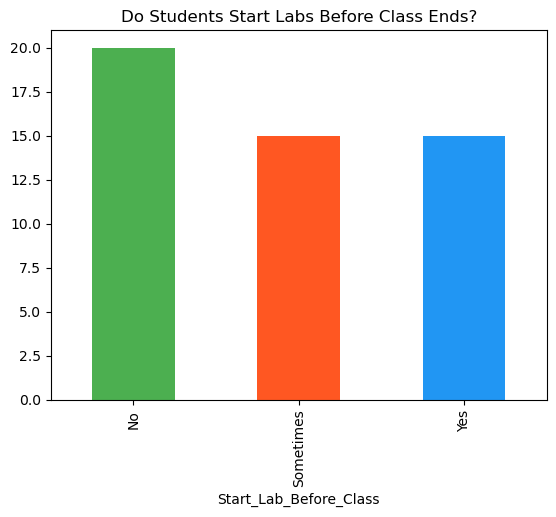

In [60]:
# Summary of key questions
print("Do students start labs early?")
print(df_combined['Start_Lab_Before_Class'].value_counts())

print("\nExtra time spent per week:")
print(df_combined['Extra_Time'].value_counts())

# Simple visualization (even with 2 data points)
import matplotlib.pyplot as plt

df_combined['Start_Lab_Before_Class'].value_counts().plot(kind='bar', color=['#4CAF50', '#FF5722', '#2196F3'])
plt.title('Do Students Start Labs Before Class Ends?')
plt.show()


In [72]:
df_combined.head(10)

,Timestamp,Age,Education,Start_Lab_Before_Class,Work_During_Lab_Hours,Extra_Time,Outside_Hours_Times,Lunch_Break,Lunch_Duration,Need_More_Time,Start_Before_Topic_Covered,Opinion_Optional
0,22/5/2025 13:50:43,45+,Grad,No,No,5-7 hours,Evenings,"Yes, always.",15-30 min,Yes,No,NaN
1,22/5/2025 13:51:46,30–34,Undergrad,Sometimes,Yes,2-4 hours,"Evenings, Late at night, Weekends",Sometimes,15-30 min,Yes,Sometimes,It would be helpful if the lab material aligne...
2,22/5/2025 14:21:04,35–39,Grad,No,No,2-4 hours,"Late at night, Weekends","Yes, always.",30-60 min,Yes,No,A better understanding of the topic
3,22/5/2025 14:51:31,40–44,Grad,No,No,5-7 hours,Evenings,"Yes, always.",30-60 min,Yes,Wait,If class was taught well and everything corres...
4,22/5/2025 15:53:53,30–34,Grad,Yes,Yes,< 2 hours,Before class in the morning,"Yes, always.",30-60 min,No,Yes,NaN
0,03/05/2025 20:07:28,25–29,Other,Sometimes,No,< 2 hours,Evenings,Yes,15-30 min,Yes,No,Longer lab hours would be beneficial
1,20/05/2025 00:56:31,40–44,Undergrad,Sometimes,No,2-4 hours,Late at night,Yes,30-60 min,Yes,Yes,NaN
2,17/05/2025 15:10:25,25–29,Grad,Yes,No,2-4 hours,Weekends,No,NaN,Yes,Yes,NaN
3,15/05/2025 05:08:16,30–34,Undergrad,Yes,No,< 2 hours,"Evenings, Late at night",Yes,> 1 hour,Yes,No,NaN
4,03/05/2025 15:22:49,30–34,Undergrad,Yes,Sometimes,5-7 hours,"Evenings, Weekends",No,NaN,Yes,No,NaN


In [62]:
df_combined['Extra_Time'].unique()

array(['5–7 hours', '2–4 hours', 'Less than 2 hours', nan,
       'More than 10 hours', '8–10 hours'], dtype=object)

In [71]:
df_combined['Education'].replace({
    "Undergraduate student": "Undergrad",
    "Graduate student": "Grad",
    "Other": "Other"
}, inplace=True)

df_combined['Extra_Time'].replace({
    "None": "0 hs",
    "Less than 2 hours": "< 2 hs",
    "2–4 hours": "2-4 hs",
    "5–7 hours": "5-7 hs",
    "8–10 hours": "8-10 hs",
    "More than 10 hours": "> 10 hs"
}, inplace=True)
df_combined['Lunch_Break'].replace({
    "Yes": "Yes",
    "No": "No",
    "Depends on the day": "Sometimes"
}, inplace=True)
df_combined['Start_Before_Topic_Covered'].replace({
    "Yes": "Yes",
    "No": "No",
    "Sometimes": "Sometimes",
    "I wait until everything is explained": "Wait"
}, inplace=True)
df_combined['Work_During_Lab_Hours'].replace({
    "Yes": "Yes",
    "No": "No",
    "Sometimes": "Sometimes"
}, inplace=True)
df_combined['Need_More_Time'].replace({
    "Yes": "Yes",
    "No": "No",
    "Not sure": "Not sure"
}, inplace=True)
df_combined['Outside_Hours_Times'].replace({
    "I only work during lab hours": "Lab hours only",
    "Evenings": "Evenings",
    "Late at night": "Late at night",
    "Weekends": "Weekends"
}, inplace=True)
df_combined['Lunch_Duration'].replace({
    "Less than 15 minutes": "< 15 min",
    "15–30 minutes": "15-30 min",
    "30–60 minutes": "30-60 min",
    "Over 1 hour": "> 1 hour"
}, inplace=True)    


Text(0.5, 1.0, 'Do Students Feel They Need More Time?')

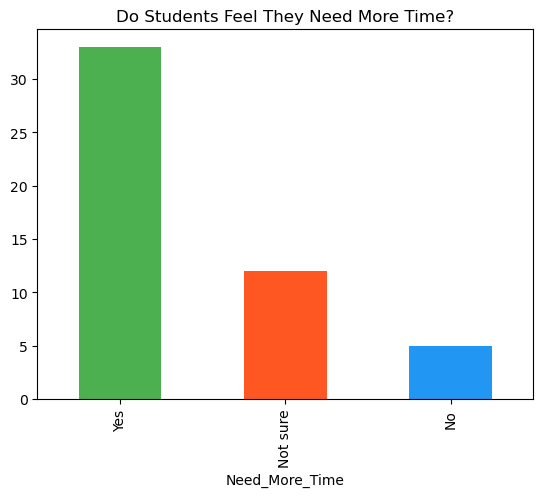

In [66]:
df_combined['Need_More_Time'].value_counts().plot(kind='bar', color=['#4CAF50', '#FF5722', '#2196F3'])
plt.title('Do Students Feel They Need More Time?')

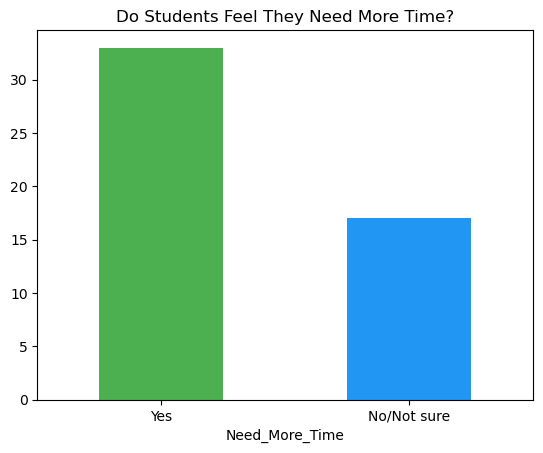

In [67]:
# Combine 'No' and 'Not sure' into one category
grouped = df2['Need_More_Time'].replace({
    'No': 'No/Not sure',
    'Not sure': 'No/Not sure'
})

# Plot with updated categories
grouped.value_counts().plot(kind='bar', color=['#4CAF50', '#2196F3'])  # Green = Yes, Blue = Combined
plt.title('Do Students Feel They Need More Time?')
plt.xticks(rotation=0)
plt.show()

In [68]:
print("\nExtra time spent per week:")
print(df_combined['Extra_Time'].value_counts())


Extra time spent per week:
Extra_Time
2-4 hours     20
5-7 hours     12
< 2 hours     10
> 10 hours     2
8-10 hours     1
Name: count, dtype: int64


In [75]:
df_combined.columns

Index(['Timestamp', 'Age', 'Education', 'Start_Lab_Before_Class',
       'Work_During_Lab_Hours', 'Extra_Time', 'Outside_Hours_Times',
       'Lunch_Break', 'Lunch_Duration', 'Need_More_Time',
       'Start_Before_Topic_Covered', 'Opinion_Optional'],
      dtype='object')

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette=palette)
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:42: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x=counts.values, y=counts.index, palette=palette)


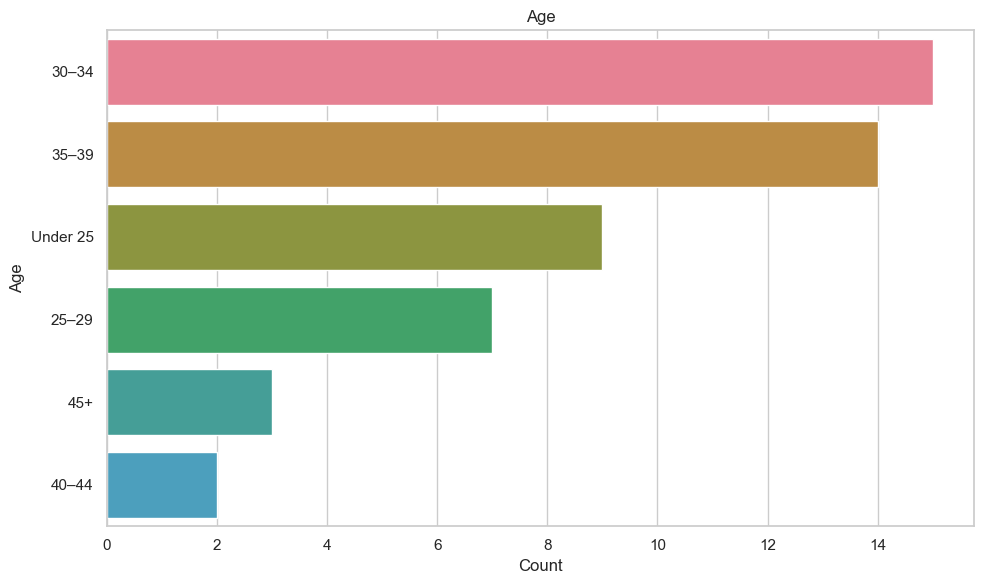

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=palette)
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:45: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=counts.index, y=counts.values, palette=palette)


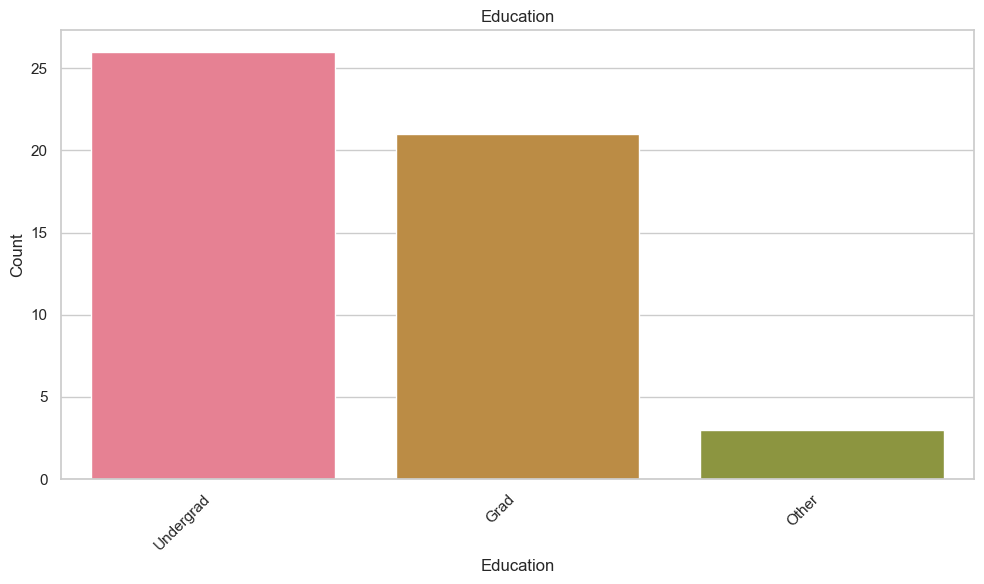

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=palette)
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:45: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=counts.index, y=counts.values, palette=palette)


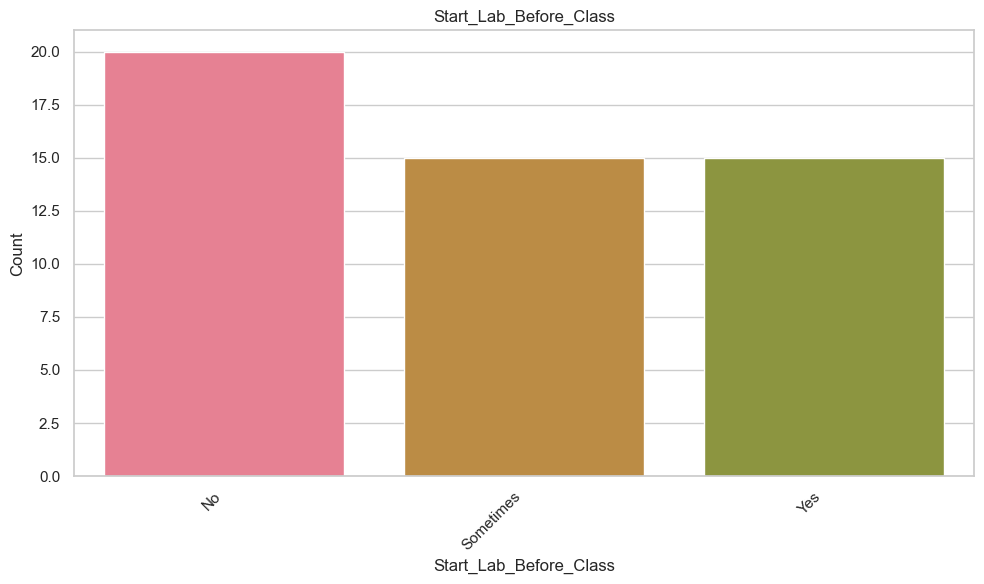

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=palette)
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:45: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=counts.index, y=counts.values, palette=palette)


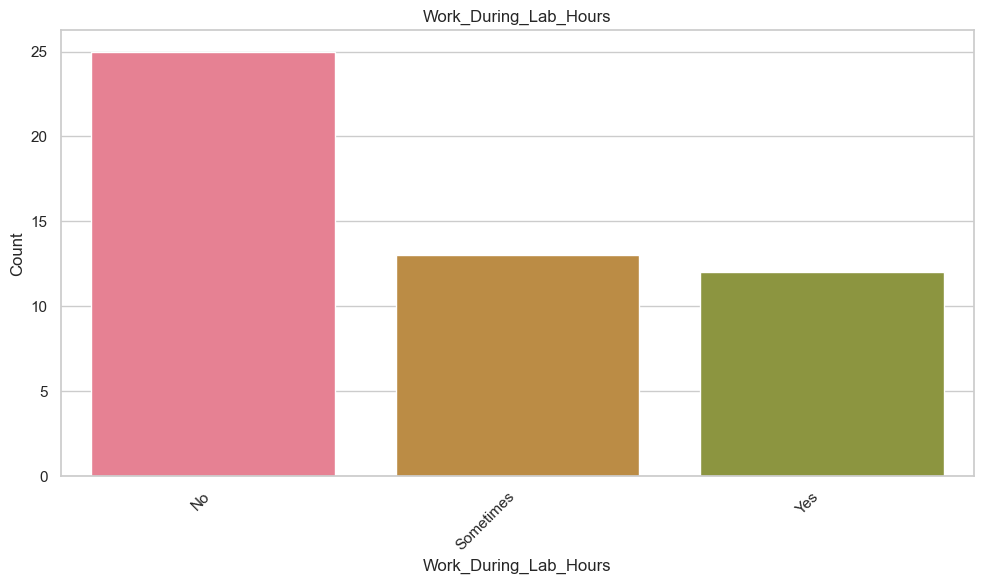

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=palette)
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:45: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x=counts.index, y=counts.values, palette=palette)


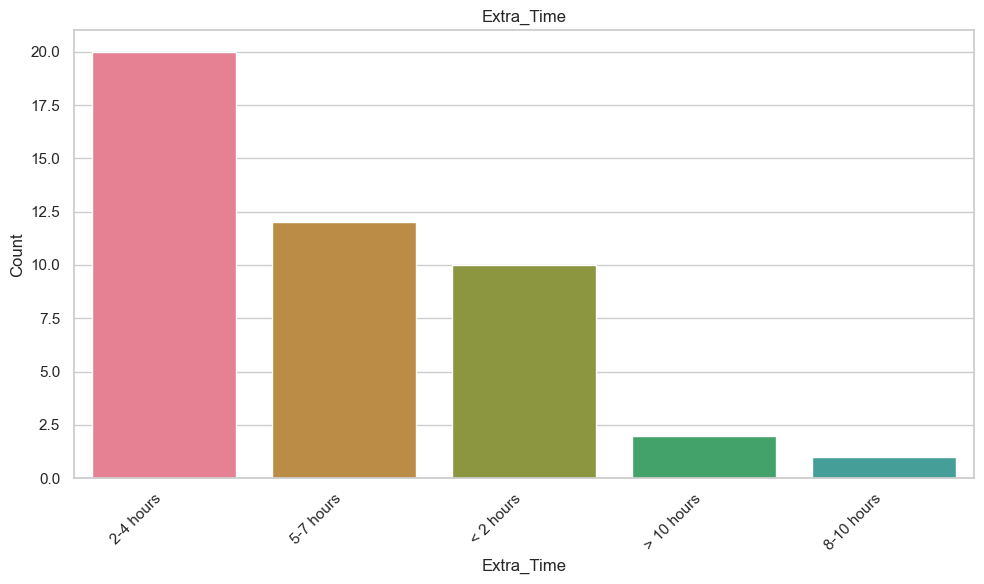

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette=palette)
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:42: UserWarning: 
The palette list has fewer values (8) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=counts.values, y=counts.index, palette=palette)


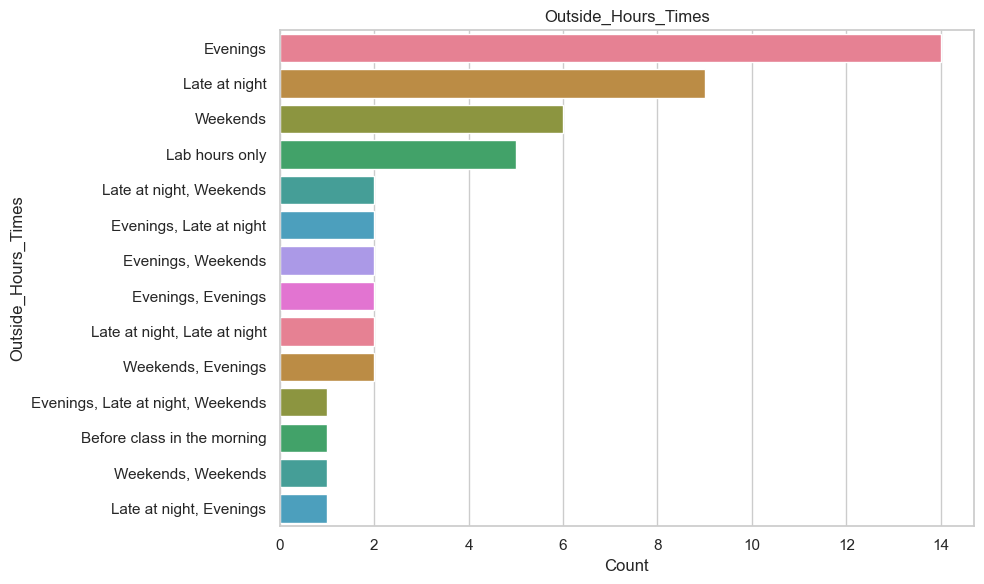

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=palette)
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:45: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x=counts.index, y=counts.values, palette=palette)


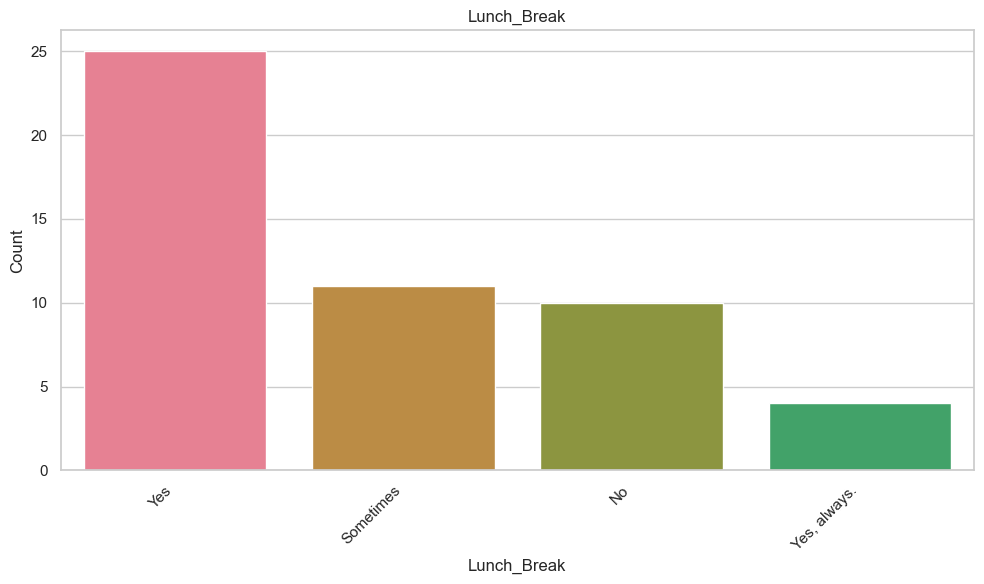

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=palette)
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:45: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=counts.index, y=counts.values, palette=palette)


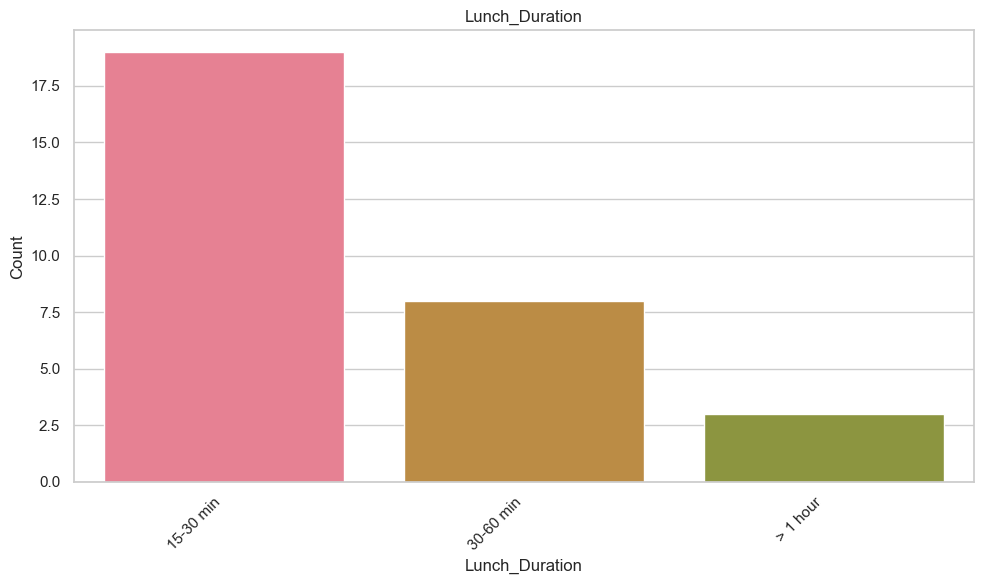

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=palette)
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:45: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x=counts.index, y=counts.values, palette=palette)


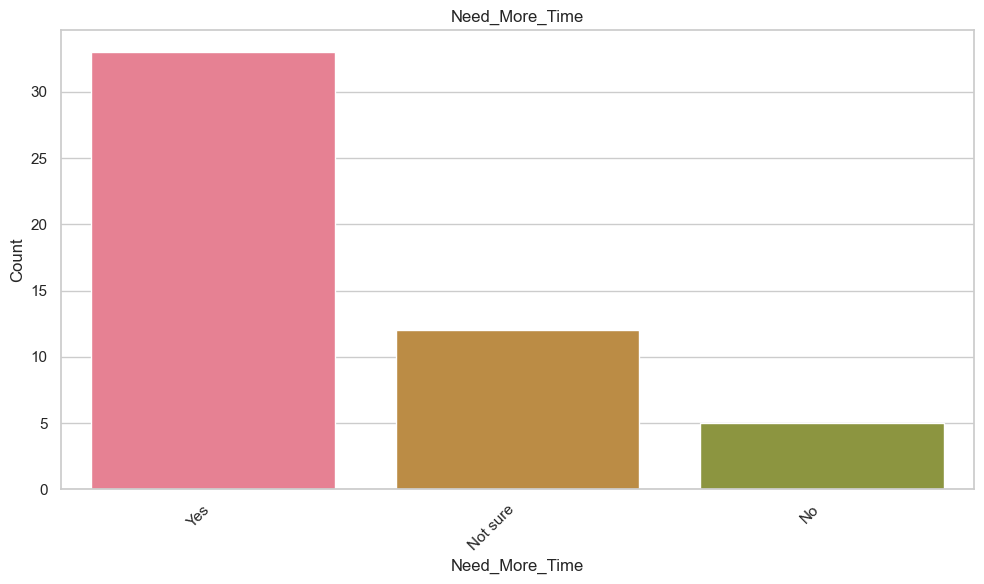

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=palette)
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_9750/4236626323.py:45: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x=counts.index, y=counts.values, palette=palette)


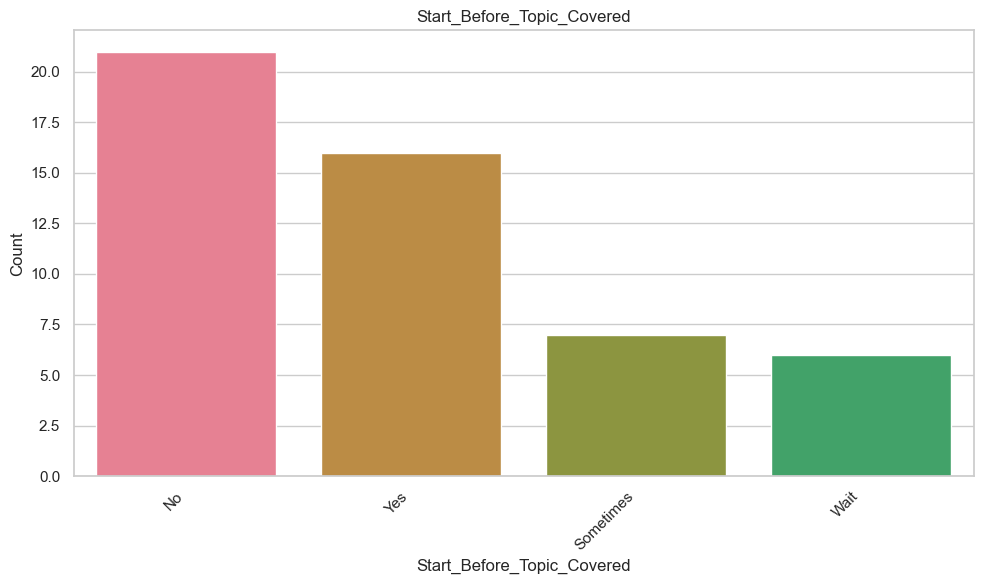

In [76]:
# import matplotlib.pyplot as plt
import seaborn as sns

# Set style and palette
sns.set_theme(style="whitegrid")
palette = sns.color_palette("husl", 8)

# List of questions to plot (adjust based on your actual columns)
# Use the SHORTER column names you defined earlier (e.g., 'Age', 'Education')
questions = [
    'Age',
    'Education',
    'Start_Lab_Before_Class',
    'Work_During_Lab_Hours',
    'Extra_Time',
    'Outside_Hours_Times',
    'Lunch_Break',
    'Lunch_Duration',
    'Need_More_Time',
    'Start_Before_Topic_Covered'
]

# Create individual plots
for question in questions:
    plt.figure(figsize=(10, 6))
    
    # Handle multi-select question differently
    if question == 'When do you usually work on labs outside scheduled hours?':
        # Split and explode multi-answers
        exploded = df_combined[question].str.split(', ').explode()
        counts = exploded.value_counts()
        
        # Plot
        sns.barplot(x=counts.values, y=counts.index, palette=palette)
        plt.title(f"{question}\n(Multiple selections allowed)")
        plt.xlabel("Count")
        
    else:
        # For single-select questions
        counts = df_combined[question].value_counts()
        if len(counts) > 5:  # Use horizontal bar for longer lists
            sns.barplot(x=counts.values, y=counts.index, palette=palette)
            plt.xlabel("Count")
        else:
            sns.barplot(x=counts.index, y=counts.values, palette=palette)
            plt.ylabel("Count")
            plt.xticks(rotation=45, ha='right')
        
    plt.title(question)
    plt.tight_layout()
    plt.show()

# Handle optional comments separately
if 'What would help you use your lab time more efficiently? (Optional)' in df_combined.columns:
    comments = df_combined['What would help you use your lab time more efficiently? (Optional)'].dropna()
    if not comments.empty:
        print("\nSample Comments:")
        print(comments.sample(5, random_state=1).to_markdown(index=False))

In [77]:
# Get counts of responses
need_more_time_counts = df_combined['Need_More_Time'].value_counts()

# Calculate proportion of "Yes" responses
n = len(df_combined)  # Total sample size
yes_count = need_more_time_counts.get('Yes', 0)
p = yes_count / n  # Proportion

In [78]:
import math

# Calculate standard error and margin of error
z = 1.96
se = math.sqrt((p * (1 - p)) / n)
margin_of_error = z * se

# Confidence interval
ci_lower = p - margin_of_error
ci_upper = p + margin_of_error

print(f"Proportion needing more time: {p:.2%}")
print(f"95% Confidence Interval: [{ci_lower:.2%}, {ci_upper:.2%}]")
print(f"Margin of Error: ±{margin_of_error:.2%}")

Proportion needing more time: 66.00%
95% Confidence Interval: [52.87%, 79.13%]
Margin of Error: ±13.13%


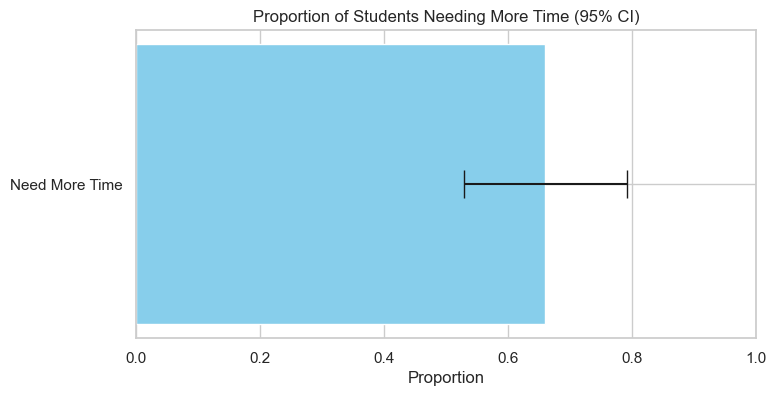

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.barh(['Need More Time'], [p], xerr=margin_of_error, color='skyblue', capsize=10)
plt.xlim(0, 1)
plt.title('Proportion of Students Needing More Time (95% CI)')
plt.xlabel('Proportion')
plt.show()

** Interpret Sampling Error**

- Key Insight: With 66% of students reporting they need more time, the true population proportion could range from ~53% to 79% due to sampling error.
- Implications:
    -   Businesses/organizations should account for this uncertainty (e.g., plan for worst-case scenarios).
    -   A larger sample size would narrow the confidence interval.

In [83]:
sample_size = df_combined.shape[0]

def calculate_sample_size(p=0.5, E=0.05, confidence=95):
    z_scores = {90: 1.645, 95: 1.96, 99: 2.576}
    z = z_scores[confidence]
    n = (z**2 * p * (1 - p)) / (E**2)
    return round(n)

# Example with your data (p=0.6222, E=0.05, 95% confidence)
sample_size = calculate_sample_size(p=0.6222, E=0.05)
print(f"Required sample size: {sample_size}")
# Output: Required sample size: 358

Required sample size: 361
